In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Flatten, Dense, Activation, Conv2D, MaxPooling2D,ZeroPadding2D, Dropout,BatchNormalization
from keras import optimizers
import matplotlib.cm as cm
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator

input_shape=(150,150,3)
img_width=150
img_height=150
batch_size=16
epocs=20

In [2]:
# for training and validation dataset
train_data_dir="./dogscats/train"
validation_data_dir="./dogscats/valid"

In [3]:
#creating dataset generator and rescale function
validation_datagen=ImageDataGenerator(
    rescale=1./255 #used to rescale image
)
train_datagen=ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.3, #randomly applies width sifting(side to side ghumaidinxa)
    height_shift_range=0.3, #randomly applies height sifting(tala mathi ghumaidinxa)
    horizontal_flip=True,
    fill_mode='nearest'# uses the fill mode nearest to fill gaps created by the above
)

In [4]:
#generating the images using the above dataset generator
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = True)

validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size = (img_width, img_height),
        batch_size = batch_size,
        class_mode = 'binary',
        shuffle = True)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [5]:
#feature engineering(designing convolution, max pool etc layers)
model=Sequential()

model.add(Conv2D(128,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(Conv2D(128,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(Conv2D(64,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(Conv2D(32,(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization())

# model.add(Conv2D(32,(3,3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))
# model.add(BatchNormalization())

# model.add(Conv2D(16,(3,3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2,2)))

#flattening the array before fitting into the neural net
model.add(Flatten())

#designing the model

model.add(Dense(1024))
model.add(Activation('relu'))

# model.add(Dense(512))
# model.add(Activation('relu'))

# model.add(Dense(256))
# model.add(Activation('relu'))

# model.add(Dense(128))
# model.add(Activation('relu'))

# model.add(Dense(64))
# model.add(Activation('relu'))

# model.add(Dense(16))
# model.add(Activation('relu'))

# model.add(Dense(8))
# model.add(Activation('relu')) yo layer lai hatauda ni hunxa

model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 128)     3584      
_________________________________________________________________
activation (Activation)      (None, 148, 148, 128)     0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 146, 146, 128)     147584    
_________________________________________________________________
activation_1 (Activation)    (None, 146, 146, 128)     0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 73, 73, 128)       0         
_________________________________________________________________
batch_normalization (BatchNo (None, 73, 73, 128)       512       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        7

In [6]:
# initiate RMSprop optimizer and configure some parameters
#opt = keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)
from tensorflow.keras.optimizers import RMSprop, SGD
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau


checkpoint = ModelCheckpoint("catvsdogs(optimized).h5",
                             monitor="val_loss",
                             mode="min",
                             save_best_only = True,
                             verbose=1)


earlystop = EarlyStopping(monitor = 'val_loss', #value being monitored for improvement
                          min_delta = 0.001,  #Abs value and is the main change required before we stop
                          patience = 5, #no of epocs we wait before stopping
                          verbose = 1,
                          restore_best_weights = True) #keep the best weigts once stopped

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss',
                              factor = 0.001,
                              patience = 5,
                              verbose = 1,
                              min_delta = 0.0001)

# we put our call backs into a callback list
callbacks = [earlystop, checkpoint, reduce_lr]

In [7]:
#compiling the model
model.compile(loss='binary_crossentropy',
              optimizer = RMSprop(learning_rate= 0.001),
              metrics=['accuracy'])

In [8]:
# train = model.fit_generator(
#     train_generator,
#     steps_per_epoch = 23000 // batch_size,
#     epochs = 20,
#     validation_data = validation_generator,
#     validation_steps = 2000 // batch_size)

#training model using callbacks
train = model.fit_generator(
    train_generator,
    steps_per_epoch = 23000 // batch_size,
    epochs = 100,
    callbacks = callbacks,
    validation_data = validation_generator,
    validation_steps = 2000 // batch_size)

C:\annaconda\envs\tf\lib\site-packages\keras\engine\training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
1437/1437 [==============================] - 145s 97ms/step - loss: 0.9355 - accuracy: 0.5712 - val_loss: 0.6907 - val_accuracy: 0.6135

Epoch 00001: val_loss improved from inf to 0.69074, saving model to catvsdogs(optimized).h5
Epoch 2/100
1437/1437 [==============================] - 138s 96ms/step - loss: 0.6558 - accuracy: 0.6283 - val_loss: 0.6208 - val_accuracy: 0.6615

Epoch 00002: val_loss improved from 0.69074 to 0.62084, saving model to catvsdogs(optimized).h5
Epoch 3/100
1437/1437 [==============================] - 138s 96ms/step - loss: 0.6261 - accuracy: 0.6656 - val_loss: 0.8038 - val_accuracy: 0.5290

Epoch 00003: val_loss did not improve from 0.62084
Epoch 4/100
1437/1437 [==============================] - 138s 96ms/step - loss: 0.5962 - accuracy: 0.6944 - val_loss: 0.9614 - val_accuracy: 0.5775

Epoch 00004: val_loss did not improve from 0.62084
Epoch 5/100
1437/1437 [==============================] - 145s 101ms/step - loss: 0.5701 - accuracy: 0.7165 - val_l

In [ ]:
# model.save('cnn_catvsdog[best_model](model_1024_neurons_and_32_kernel_convolution).h5')

In [9]:
train.history 

{'loss': [0.935548722743988,
  0.6558434963226318,
  0.6260935664176941,
  0.5962239503860474,
  0.570068359375,
  0.5523422956466675,
  0.5272998213768005,
  0.5016509294509888,
  0.49255630373954773,
  0.4547309875488281,
  0.43733158707618713,
  0.4247216284275055,
  0.4107815623283386,
  0.3945118188858032,
  0.3919667899608612,
  0.3880031406879425,
  0.37061673402786255,
  0.3678651452064514,
  0.36229202151298523],
 'accuracy': [0.5711799263954163,
  0.6282631158828735,
  0.6655934453010559,
  0.6944395899772644,
  0.7165419459342957,
  0.7348155379295349,
  0.7513052821159363,
  0.7703185081481934,
  0.771841287612915,
  0.7929864525794983,
  0.8059954643249512,
  0.8084319233894348,
  0.8206143379211426,
  0.8270971179008484,
  0.8262269496917725,
  0.8366254568099976,
  0.8383222818374634,
  0.8432387709617615,
  0.8444135189056396],
 'val_loss': [0.6907398700714111,
  0.6208419799804688,
  0.8038042187690735,
  0.9614014029502869,
  2.371500253677368,
  0.7117733359336853,
 

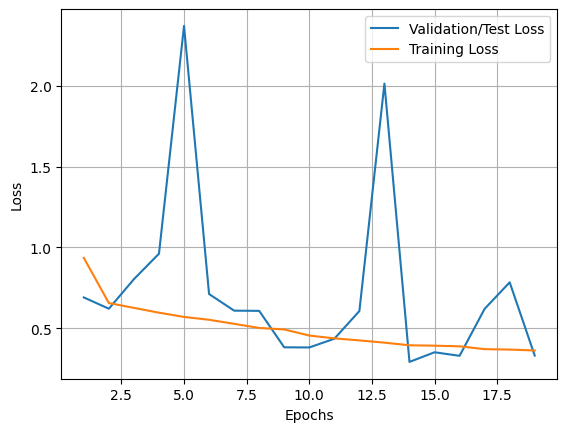

In [10]:
# Plotting our loss charts
import matplotlib.pyplot as plt

history_dict = train.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')

plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

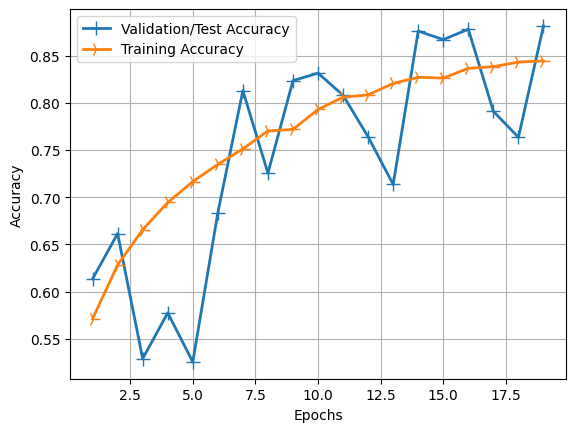

In [11]:
# Plotting our accuracy charts
import matplotlib.pyplot as plt

history_dict = train.history

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

C:\annaconda\envs\tf\lib\site-packages\keras\engine\training.py:2035: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


[[1000    0]
 [1000    0]]


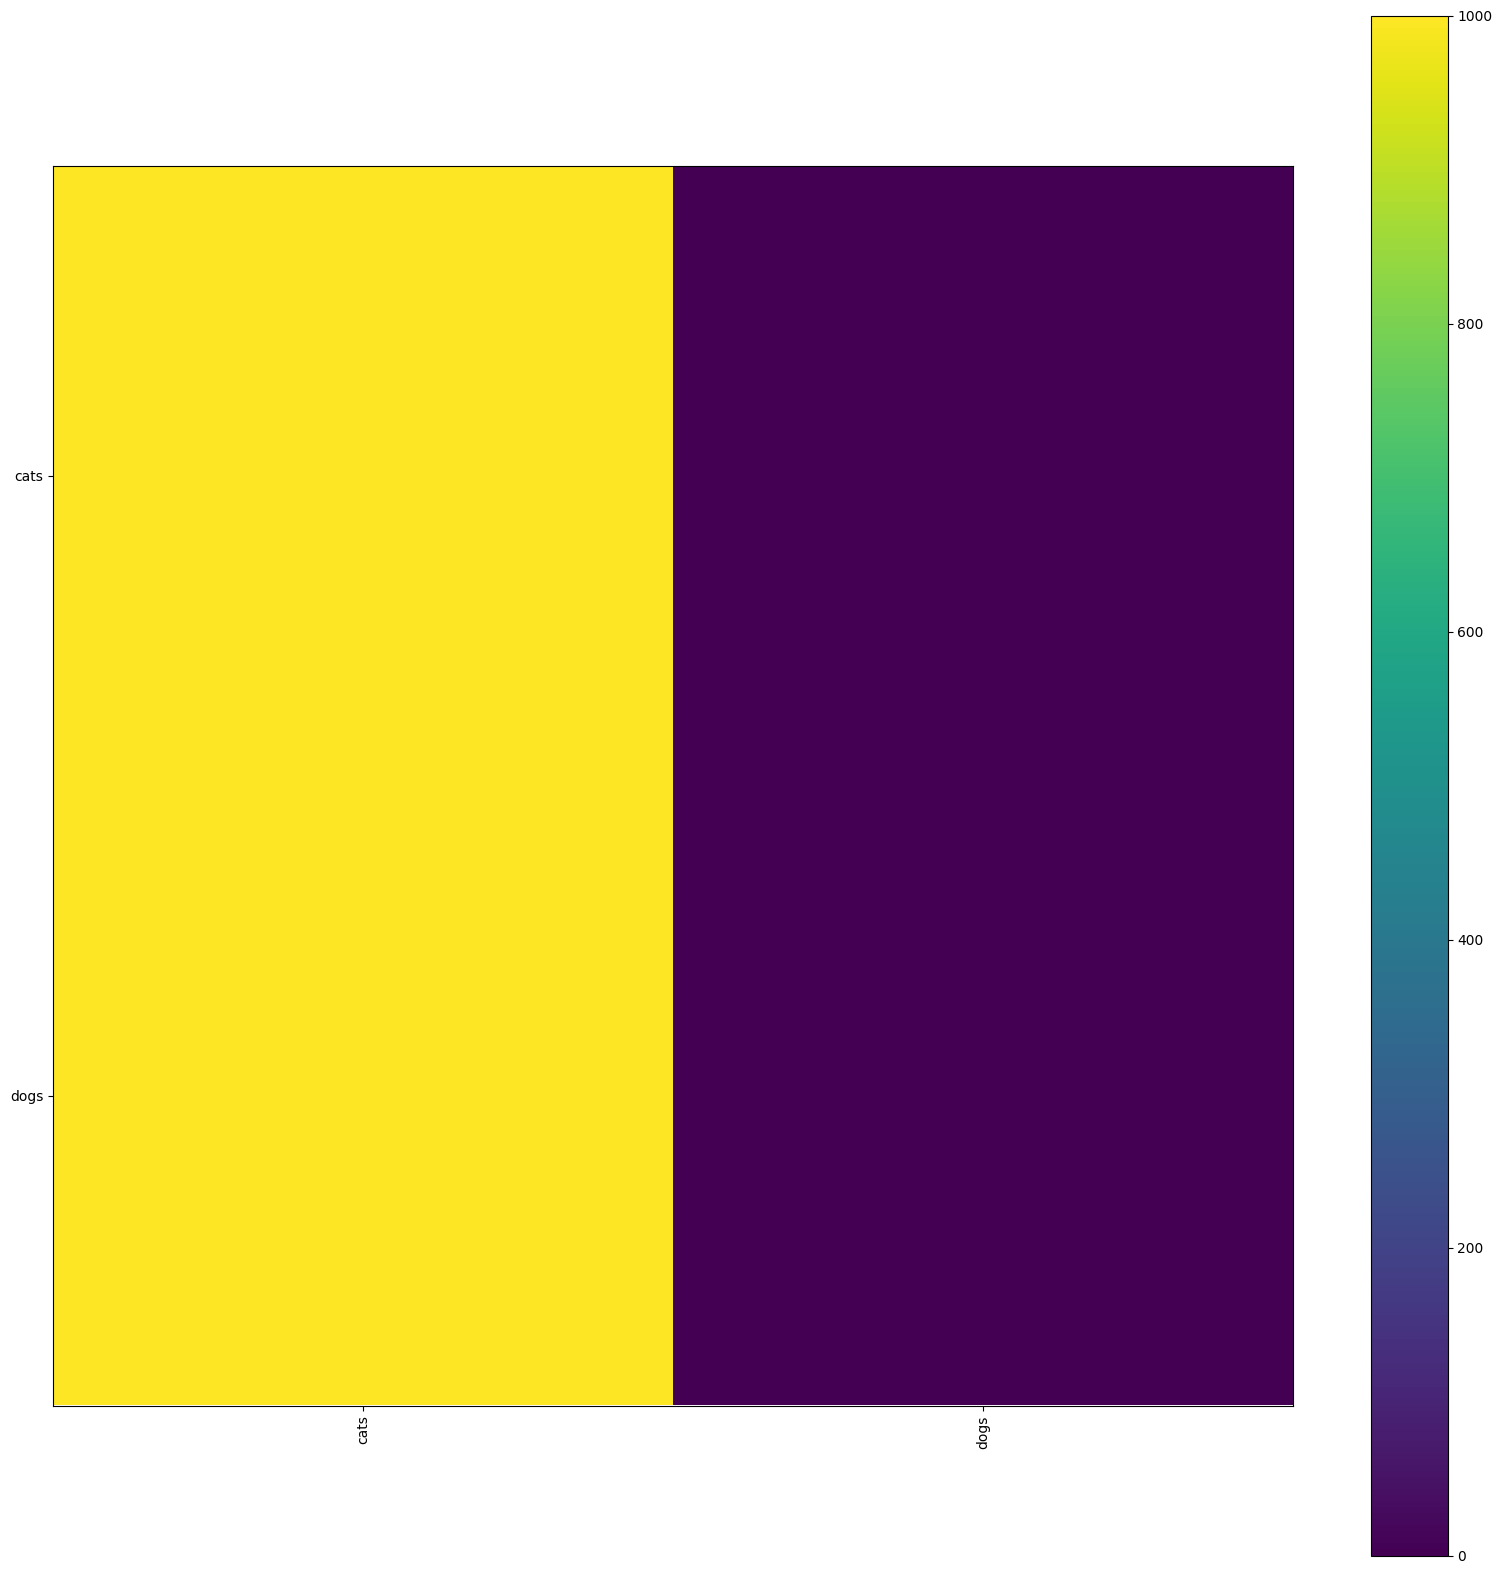

In [12]:
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
from keras.models import load_model

img_row, img_height, img_depth = 150,150,3


class_labels = validation_generator.class_indices
class_labels = {v: k for k, v in class_labels.items()}
classes = list(class_labels.values())

nb_train_samples = 8005
nb_validation_samples = 2023

#Confution Matrix and Classification Report
Y_pred = model.predict_generator(validation_generator, nb_validation_samples // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)

target_names = list(class_labels.values())

plt.figure(figsize=(20,20))
cnf_matrix = confusion_matrix(validation_generator.classes, y_pred)
print(cnf_matrix)
plt.imshow(cnf_matrix, interpolation='nearest')
plt.colorbar()
tick_marks = np.arange(len(classes))
_ = plt.xticks(tick_marks, classes, rotation=90)
_ = plt.yticks(tick_marks, classes)

(1, 150, 150, 3)
[[0.]]
[[0.]]
this is cat


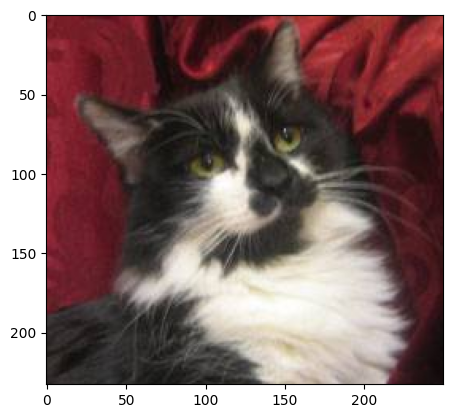

In [17]:
#testing the model on datas from test dataset

import numpy as np
import tensorflow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import load_img
from tensorflow.keras import models
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as img

image_path = './dogscats/test1/221.jpg'
model = models.load_model('catvsdogs(optimized).h5')
test_image = load_img(image_path,target_size = (150,150,3))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image,axis = 0)
print(test_image.shape)
result = model.predict(test_image)
print(result)
print(result)
if result[0][0] == 1:
  print("This is dog")
else:
  print("this is cat")
  # reading the image
testImage = img.imread(image_path)

# displaying the modified image
plt.imshow(testImage)